## Image classification using Tensor-Flow


In [3]:
import tensorflow as tf

print(tf.__version__)

2.1.0


In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()


# shape of data 

In [5]:
print('x_train shape:',  x_train.shape)
print('x_test shape:',  x_test.shape)
print('y_train shape:',  y_train.shape)
print('y_test shape:',  y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


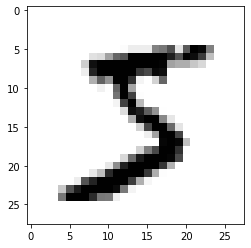

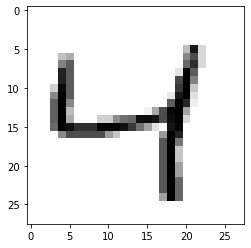

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='binary')
plt.show()
plt.imshow( x_train[2], cmap='binary')
plt.show()

In [9]:
y_train[2]


4

In [10]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## one hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## validate shape

In [12]:
print('y_train_encoded:', y_train_encoded.shape)
print('y_test_encoded:', y_test_encoded.shape)

y_train_encoded: (60000, 10)
y_test_encoded: (10000, 10)


In [13]:
 y_train_encoded[0],  y_train_encoded[2]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

## neural network

In [14]:
import numpy as np
x_train_reshaped =  np.reshape(x_train, (60000,784))
x_test_reshaped =  np.reshape(x_test, (10000,784))

print('x_train_reshaped:', x_train_reshaped.shape)
print('x_test_reshaped:', x_test_reshaped.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)


In [15]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [16]:
# data normalization
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [17]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

## Create Model

In [45]:
#from tensorflow.keras.models import sequential
#from tensorflow.keras.layers import Dense



#from keras.models import Sequential
#from keras.layers import Dense 
# Creating a Sequential Model and adding the layers
#model = Sequential()

#model.add(Dense(128, activation=relu),input_shape= (784,))
#model.add(Dense(128, activation=relu)
#model.add(Dropout(0.2))
#model.add(Dense(10,activation=tf.nn.softmax))

model = tf.keras.models.Sequential([
  
  tf.keras.layers.Dense(128,activation='relu',input_shape= (784,)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [46]:
# compiling
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [48]:
# training
#model.fit(x_train_norm, y_train_encoded, epochs=3)
model.fit(x_train_norm, y_train_encoded,  epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.3763 - accuracy: 0.8906
Epoch 2/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1893 - accuracy: 0.9450
Epoch 3/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1438 - accuracy: 0.9590


In [50]:
loss, accuracy = model.evaluate(x_train_norm, y_train_encoded)
print('test set accuracy:', accuracy*100)

60000/60000 [==============================] - 3s 56us/sample - loss: 0.1186 - accuracy: 0.9667
test set accuracy: 96.67166471481323


In [53]:
# prediction
preds = model.predict(x_test_norm)
print('shape of preds:', preds.shape)

shape of preds: (10000, 10)


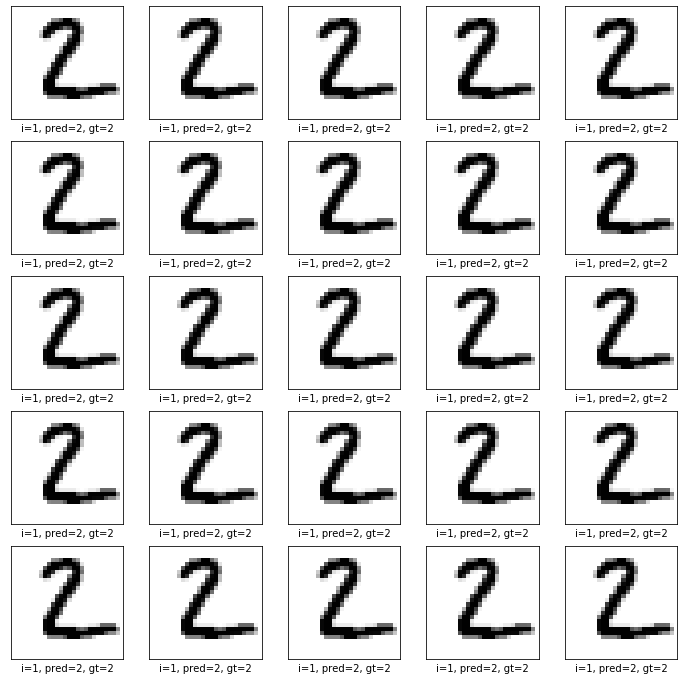

In [57]:
plt.figure(figsize=(12,12))

start_index = 0
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+1])
    gt = y_test[start_index+1]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+1, pred, gt))
    plt.imshow(x_test[start_index+1], cmap= 'binary')
plt.show()

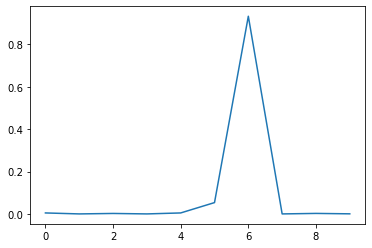

In [58]:
plt.plot(preds[8])
plt.show()